In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, Input
from keras.models import Model
from keras.models  import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers, initializers, regularizers, metrics, callbacks
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

In [7]:
cifar10 = datasets.cifar10

In [8]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [9]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [10]:
train_images = train_images/255.0
test_images = test_images/255.0

In [11]:
x = np.concatenate((train_images, test_images))
y = np.concatenate((train_labels, test_labels))

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 42) # train / test 분할

In [12]:
train_input, val_input, train_target, val_target = train_test_split(x_train, y_train, test_size = 0.1,
                                                                    random_state = 42) # train / val 분할

In [13]:
print(train_input.shape, train_target.shape, val_input.shape, val_target.shape)

(48600, 32, 32, 3) (48600, 1) (5400, 32, 32, 3) (5400, 1)


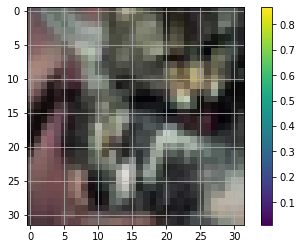

In [14]:
plt.figure()
plt.imshow(train_input[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [15]:
batch_size = 512
num_classes = len(np.unique(train_target))
epochs = 50
lr = 1e-4
lr_weight_decay = 0.95

train_target = np_utils.to_categorical(train_target, num_classes) # one-hot vector로 변환
val_target = np_utils.to_categorical(val_target, num_classes)

In [17]:
from keras import initializers
import copy

result = {}
y = {}
loss = []
accuracy = []

dropouts = [num/10 for num in range(10)]

for dropout in dropouts:
    print("Dropout : ", (dropout))
    model = Sequential()

    # layer 1
    model.add(Conv2D(64, 3, padding='same', activation='relu',input_shape=(train_input.shape[1:])))
    model.add(Dropout(dropout))  
    model.add(Conv2D(64, 3, activation='relu',padding='same'))
    model.add(Dropout(dropout))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # layer 2
    model.add(Conv2D(128, 3, activation='relu',padding='same'))
    model.add(Dropout(dropout))                                        
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # layer 3                         
    model.add(Conv2D(256, 3, activation='relu',padding='same'))
    model.add(Dropout(dropout)) 
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # layer 4
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))

    # layer 5
    model.add(Dense(512, activation='relu'))

    # layer 6
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only = True)

    early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights = True)

    history = model.fit(train_input, train_target, batch_size=batch_size, epochs =epochs, verbose=1, 
                        shuffle=True, validation_data=(val_input, val_target),
                        callbacks = [checkpoint_cb, early_stopping_cb])
    
    score = model.evaluate(val_input, val_target, verbose=0)
    y[dropout] = model.predict(val_input)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])
    result[dropout] = copy.deepcopy(history.history)   
    loss.append(score[0])
    accuracy.append(score[1])

Dropout :  0.0
Epoch 1/50
95/95 [==============================] - 3s 21ms/step - loss: 1.6950 - accuracy: 0.3766 - val_loss: 1.3242 - val_accuracy: 0.5302
Epoch 2/50
95/95 [==============================] - 2s 17ms/step - loss: 1.1985 - accuracy: 0.5678 - val_loss: 1.0667 - val_accuracy: 0.6198
Epoch 3/50
95/95 [==============================] - 2s 17ms/step - loss: 0.9594 - accuracy: 0.6622 - val_loss: 0.8906 - val_accuracy: 0.6852
Epoch 4/50
95/95 [==============================] - 2s 17ms/step - loss: 0.7971 - accuracy: 0.7214 - val_loss: 0.7963 - val_accuracy: 0.7215
Epoch 5/50
95/95 [==============================] - 2s 17ms/step - loss: 0.6734 - accuracy: 0.7653 - val_loss: 0.7825 - val_accuracy: 0.7313
Epoch 6/50
95/95 [==============================] - 2s 20ms/step - loss: 0.5629 - accuracy: 0.8052 - val_loss: 0.7269 - val_accuracy: 0.7496
Epoch 7/50
95/95 [==============================] - 2s 17ms/step - loss: 0.4776 - accuracy: 0.8360 - val_loss: 0.7199 - val_accuracy: 0.757

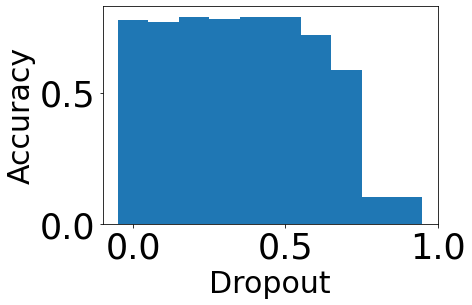

In [25]:
import numpy as np                                                               
import matplotlib.pyplot as plt

# plt.figure(figsize = (13,10))
width = 0.1

plt.bar(dropouts, accuracy, width, align='center')

plt.tick_params(axis='both', which='major', labelsize=35)
plt.tick_params(axis='both', which='minor', labelsize=35)

plt.ylabel('Accuracy',size = 30)
plt.xlabel('Dropout', size = 30)
plt.show()

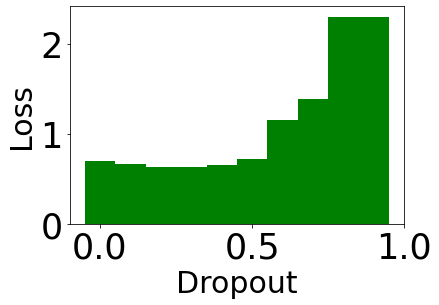

In [24]:
width = 0.1

plt.bar(dropouts, loss, width, align='center',color = 'green')

plt.tick_params(axis='both', which='major', labelsize=35)
plt.tick_params(axis='both', which='minor', labelsize=35)

plt.ylabel('Loss',size = 30)
plt.xlabel('Dropout', size = 30)
plt.show()